In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [ ]:
!pip install openpyxl

In [ ]:
!pip install ipywidgets

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

# Data Load

In [1]:
import pandas as pd

IS_HAM = True

# 정상 데이터
if IS_HAM:
    mergedData = pd.read_csv("./data/ham.csv")
else:
    # 비정상 데이터
    mergedData = pd.read_csv("./data/trap_1.csv",header=None)
    # spam 용 데이터 처피
    mergedData=mergedData.iloc[:,[10]]
    mergedData.rename(columns={10:'텍스트'},inplace=True)

print("사이즈 : "+str(len(mergedData)))

mergedData = mergedData.dropna()
print("사이즈 : "+str(len(mergedData)))

사이즈 : 62979
사이즈 : 62979


In [2]:
mergedData

,텍스트
0,ㅡㅡ;;
1,ㅡㅡ
2,ㅡㅡ
3,ㅠㅠㅠㅠㅠ 행님 ㅜㅜ
4,ㅠㅠㅠ
...,...
62974,계장님 상황실입니다. 통화끝나시면 전화주실수있으신가요?
62975,[Web발신]\n팔달영업부 차장 곽귀애. 부친상. 2일발인. 대구전문장례식장 102...
62976,[Web발신]\n팔달영업부 차장 곽귀애. 부친상. 2일발인. 대구전문장례식장 102...
62977,[Fint] 인증문자 보내기 Tw+9eh7JHwanjjtwhLYdWTs8jWo6uc...


# 전처리

In [3]:
mergedData = pd.DataFrame(mergedData, columns=['텍스트'])

#### URL 등 의미없는 문자 제거

In [4]:
import re
import numpy as np
from tqdm import trange, nhttp://dgbrnd.iptime.org:8080/http://dgbrnd.iptime.org:8080/otebook 
# URL 제거
mergedData = mergedData['텍스트'].str.replace('(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])','',regex=True)
mergedData = pd.DataFrame(mergedData, columns=['텍스트'])
mergedData = mergedData['텍스트'].str.replace('/(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})/gi','',regex=True)
mergedData = pd.DataFrame(mergedData, columns=['텍스트'])



# web발신 제거
mergedData = mergedData['텍스트'].str.replace('[Web발신]','',regex=False)
mergedData = pd.DataFrame(mergedData, columns=['텍스트'])

# 개행문자 제거
mergedData = mergedData['텍스트'].str.replace('\n','',regex=False)
mergedData = pd.DataFrame(mergedData, columns=['텍스트'])

# 한글만 남기기
for i in notebook.tqdm(mergedData.index):
    text = mergedData._get_value(i,'텍스트')
    if type(text) == str:
        mergedData._set_value(i,'텍스트',re.sub(r"[^ㄱ-ㅣ가-힣\s]", "", text))
    else:
        t = np.array2string(text)
        print(t)
        
        #mergedData._set_value(i,'텍스트',np.nan) 

# 중복 제거
mergedData = mergedData.drop_duplicates()
mergedData = mergedData.dropna()

  0%|          | 0/62979 [00:00<?, ?it/s]

In [5]:
mergedData

,텍스트
0,ㅡㅡ
3,ㅠㅠㅠㅠㅠ 행님 ㅜㅜ
4,ㅠㅠㅠ
6,ㅠㅠ 택배거래해야하는데 계좌좀주세요
7,ㅠㅠ 죄송합니다 제가 어차피 주말밖에 시간이안되서요 혹여나 불발나면 알려드릴게요
...,...
62970,현대홈고객님 성명연락처등 정보가 년미이용으로 에 분리보관파기됩니다
62971,도도 포인트 포인트 사용루트커피에서 사용하시겠어요도용 방지를 위해 인증번호 를 ...
62972,국외발신제페토 인증 코드는 입니다 분 이내에 입력해주세요
62974,계장님 상황실입니다 통화끝나시면 전화주실수있으신가요


#### 맞춤법 교정

##### 1.pyKoSpacing 모듈 사용

In [ ]:
from tqdm import trange, notebook 
from pykospacing import Spacing
import numpy as np
spacing = Spacing()
# mergedData.index
for i in notebook.tqdm(mergedData.index):
    text = mergedData._get_value(i,'텍스트')
    if type(text) == str:
        mergedData._set_value(i,'텍스트',spacing(text))
    else:http://dgbrnd.iptime.org:8080/
        mergedData._set_value(i,'텍스트',np.nan)
        
# 불가능한 것 제거
mergedData = mergedData.dropna()
# 결과물 엑셀 저장




if IS_HAM:
    print("정상 데이터 저장 >> "+str(len(mergedData)))
    mergedData.to_excel('output-koSpacing-h.xlsx')
else:
    print("비정상 데이터 저장 >> "+str(len(mergedData)))
    mergedData.to_excel('output-koSpacing-s.xlsx')
    


##### 2.Py-HanSpell 사용

In [ ]:
from tqdm import trange, notebook 
from hanspell import spell_checker
import numpy as np


# mergedData.index
for i in notebook.tqdm(mergedData.index):
    text = mergedData._get_value(i,'텍스트')
    
    if type(text) == str:
        spelled_sent = spell_checker.check(text)
        
        mergedData._set_value(i,'텍스트',spelled_sent.checked)
    else:
        mergedData._set_value(i,'텍스트',np.nan)
        
# 불가능한 것 제거
mergedData = mergedData.dropna()
# 결과물 엑셀 저장
mergedData.to_excel('output-naver.xlsx')

In [ ]:
# 결과 mergedData
mergedData

# 데이터 학습

### 데이터 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = pd.read_csv('merged_sh.csv')
print('총 샘플의 수 :',len(data))
 

총 샘플의 수 : 24041


In [3]:
data = data.sample(frac=1).reset_index(drop=True)
data[:5]

,v1,v2
0,Ham,우리카드 이용 안내 우리 승인 박우님 원 일시불 마시 그래이 이시아폴 누적원 카드 ...
1,Ham,주간 체크포인트 이건 꼭 봐야 돼 중국의 셧다운 증시에 악재로 반영 시작 진정될 기...
2,Ham,보냈습니다 엠비언트 랑 풋 등까지 하면 얼마죠
3,Spam,광고제스트바른 경제 출연가난은 죄가 아니다 무료 거부
4,Ham,늦게 죄송합니다 낼 전화주세요


In [4]:
data['v1'] = data['v1'].replace(['Ham','Spam'],[0,1])

In [5]:
data[:5]

,v1,v2
0,0,우리카드 이용 안내 우리 승인 박우님 원 일시불 마시 그래이 이시아폴 누적원 카드 ...
1,0,주간 체크포인트 이건 꼭 봐야 돼 중국의 셧다운 증시에 악재로 반영 시작 진정될 기...
2,0,보냈습니다 엠비언트 랑 풋 등까지 하면 얼마죠
3,1,광고제스트바른 경제 출연가난은 죄가 아니다 무료 거부
4,0,늦게 죄송합니다 낼 전화주세요


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24041 entries, 0 to 24040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      24041 non-null  int64 
 1   v2      24041 non-null  object
dtypes: int64(1), object(1)
memory usage: 375.8+ KB


In [7]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [8]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 23378


In [9]:
# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 23378


### 악성 문자와, 정상 문자의 값 분포 시각화

<AxesSubplot:>

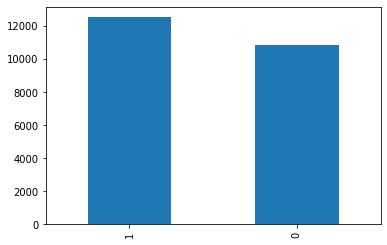

In [10]:
data['v1'].value_counts().plot(kind='bar')

In [11]:
print('악성 문자와 정상 문자의 개수')
print(data.groupby('v1').size().reset_index(name='count'))

악성 문자와 정상 문자의 개수
   v1  count
0   0  10840
1   1  12538


In [12]:
print(f'정상 문자의 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'악성 문자의 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

정상 문자의 비율 = 46.368%
악성 문자의 비율 = 53.632%


In [13]:
X_data = data['v2']
y_data = data['v1']
print('문자 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

문자 본문의 개수: 23378
레이블의 개수: 23378


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [15]:
print('--------학습 데이터의 비율-----------')
print(f'정상 문자 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'악성 문자 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------학습 데이터의 비율-----------
정상 문자 = 46.369%
악성 문자 = 53.631%


In [16]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 문자 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'악성 문자 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 문자 = 46.364%
악성 문자 = 53.636%


### 텍스트 토크나이징

In [17]:
tokenizer = Tokenizer()
# 등장빈도가 1회인 단어들은 제외 
#tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:1])

[[7, 6, 2441, 1790, 404, 18, 20584, 4310, 1840, 479, 1877, 9, 2535, 13977, 13978, 18, 7842, 22, 43, 31, 113, 97, 91, 409, 17, 487, 162, 2442, 16, 17, 238, 730, 2443, 5, 769, 194, 22, 14, 18, 30, 466, 54, 731, 231, 19, 40, 27, 114, 2223, 31, 190, 11, 5460, 1971, 987, 13979, 921, 55, 160, 308, 55, 1665, 386, 21, 49, 8, 240, 1129, 74, 10, 204, 86, 106, 124, 18, 813, 60, 54, 115, 125, 2163, 231, 58, 154, 10, 466, 54, 6167, 51, 225, 1878, 1209, 526, 428, 1185, 21, 230, 51, 225, 291, 526, 428, 1185, 1334, 13980, 625, 20, 693, 2040, 2536, 22, 21, 146, 185, 418, 49, 20585, 20586, 21, 55, 208, 480, 531, 1210, 9, 55, 160, 308, 55, 9, 931, 1425, 480, 21, 49, 8, 240, 1129, 74, 10, 204, 86, 106, 98, 1359, 1972, 376, 1031, 1311, 179, 78, 44, 1049, 35, 1973, 1451, 1112, 797, 8, 81, 331, 44, 2093, 410, 14, 62, 1, 2]]


In [18]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'무료': 1, '거부': 2, '광고': 3, '원': 4, '수': 5, '신고': 6, '스팸': 7, '시': 8, '등': 9, '및': 10, '승인': 11, '한': 12, '년': 13, '바랍니다': 14, '있습니다': 15, '월': 16, '일': 17, '상품': 18, '만': 19, '주': 20, '가능': 21, '신청': 22, '정보': 23, '확인': 24, '종목': 25, '입장': 26, '이상': 27, '대출': 28, '이': 29, '안내': 30, '접수': 31, '있는': 32, '일시불': 33, '명': 34, '후': 35, '누적원': 36, '다': 37, '수익': 38, '잔액': 39, '세': 40, '입니다': 41, '번': 42, '방법': 43, '수신': 44, '차': 45, '박우원': 46, '지금': 47, '따라': 48, '진행': 49, '출금': 50, '이용': 51, '신규': 52, '내': 53, '한도': 54, '상환': 55, '없이': 56, '기간': 57, '지원': 58, '박우님': 59, '최대': 60, '참여': 61, '감사합니다': 62, '중': 63, '함께': 64, '대구': 65, '드립니다': 66, '바로': 67, '고객': 68, '국외': 69, '국제발신': 70, '기준': 71, '문의': 72, '합니다': 73, '수수료': 74, '안녕하세요': 75, '선착순': 76, '내일': 77, '거': 78, '만원': 79, '수신거부': 80, '아래': 81, '더': 82, '체크': 83, '롯데': 84, '삼성': 85, '발생': 86, '주식': 87, '많은': 88, '절대': 89, '가능합니다': 90, '시간': 91, '사업자': 92, '문자': 93, '좋은': 94, '분': 95, '직장인': 96, '상담': 97, '본': 98, '오늘': 99, '무료로': 100, '

In [19]:
tokenizer.word_counts.items()

odict_items([('스팸', 1865), ('신고', 1878), ('광고웰컴', 22), ('저축', 33), ('은행', 137), ('상품', 1369), ('안내꽃샘추위', 1), ('건강에', 11), ('유의', 32), ('하세요', 119), ('고객님들의', 31), ('등', 1741), ('저축은행', 21), ('웰컴저축은행에서', 2), ('통합론', 2), ('안내해드리겠습니다', 5), ('신청', 1055), ('방법', 707), ('접수', 915), ('전화', 361), ('상담', 411), ('시간', 425), ('토', 136), ('일', 1418), ('공휴일', 118), ('제', 285), ('외년', 22), ('월', 1456), ('마감', 203), ('조기', 82), ('마감될', 22), ('수', 1901), ('있으니', 78), ('빠른', 254), ('바랍니다', 1469), ('안내', 919), ('높은', 122), ('한도', 634), ('낮은', 82), ('금리', 210), ('만', 1302), ('세', 750), ('이상', 954), ('국내', 360), ('거주자', 25), ('당일', 258), ('승인', 1552), ('가능직업이나', 8), ('소득에', 29), ('관계', 62), ('무관원리금', 2), ('균등', 66), ('상환', 626), ('만기', 286), ('일시', 166), ('자유롭게', 36), ('선택', 142), ('가능', 1135), ('진행', 649), ('시', 1805), ('별도', 201), ('발생하는', 56), ('수수료', 483), ('및', 1729), ('기타', 239), ('발생', 443), ('비용', 390), ('없습니다', 346), ('요약', 73), ('최대', 574), ('억원', 359), ('이내', 345), ('연금리', 26), ('지원', 590), ('혜

In [20]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 2 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print("전체 단어 수: %s"%total_cnt)

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

전체 단어 수: 42310
등장 빈도가 1번 이하인 희귀 단어의 수: 21729
단어 집합(vocabulary)에서 희귀 단어의 비율: 51.35665327345781
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.690988765751914


In [21]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 42311


문자의 최대 길이 : 273
문자의 평균 길이 : 20.413806


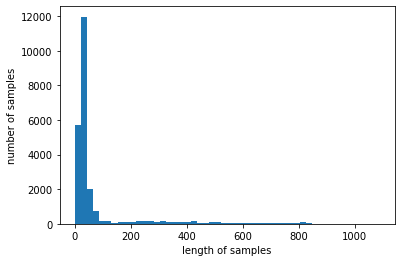

In [22]:
print('문자의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('문자의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

##### 같은 길이를 가지게 하기 위해서 패딩 추가

In [24]:
max_len = 76
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (18702, 76)


In [25]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


2022-10-23 17:46:01.649989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 17:46:01.654558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 17:46:01.655304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 17:46:01.656384: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          1353952   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,356,065
Trainable params: 1,356,065
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
  7/234 [..............................] - ETA: 4s - loss: 0.6704 - acc: 0.6540 

2022-10-23 17:46:47.842686: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


234/234 [==============================] - 6s 20ms/step - loss: 0.2045 - acc: 0.9223 - val_loss: 0.0791 - val_acc: 0.9727
Epoch 2/4
234/234 [==============================] - 4s 19ms/step - loss: 0.0517 - acc: 0.9816 - val_loss: 0.0656 - val_acc: 0.9770
Epoch 3/4
234/234 [==============================] - 4s 19ms/step - loss: 0.0291 - acc: 0.9901 - val_loss: 0.0677 - val_acc: 0.9765
Epoch 4/4
234/234 [==============================] - 4s 19ms/step - loss: 0.0187 - acc: 0.9939 - val_loss: 0.0636 - val_acc: 0.9802


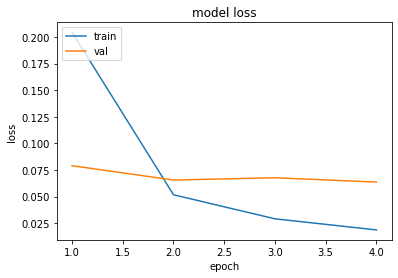

In [29]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
## 모델 저장
model.save('sms_model.h5')

## 예측 함수 생성

In [37]:
from tqdm import trange, notebook 
from pykospacing import Spacing
import numpy as np
import re

def sentiment_predict(new_sentence):
    # URL 제거
    new_sentence = re.sub(r"(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])","",new_sentence)
    new_sentence = re.sub(r'/(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})/gi','',new_sentence)
    
    # web발신 제거
    new_sentence = new_sentence.replace('[Web발신]','')

    # 개행문자 제거
    new_sentence = new_sentence.replace('\n','')
    
    # 한글만 처리
    new_sentence  = re.sub(r"[^ㄱ-ㅣ가-힣\s]", "", new_sentence)

    spacing = Spacing()
    new_sentence = spacing(new_sentence)
    
    
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(model.predict(pad_new))*100 # 예측
    print(score)

### 예측

In [45]:
test_sentence = "안녕하세요 우리은행 고객님, 대환상품이 있어 연락드렸습니다."

sentiment_predict(test_sentence)

0.013957869668956846
